In [32]:
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
no_smile = glob.glob('non_smile/*.jpg')
smile = glob.glob('smile/*.jpg')
test = glob.glob('For_Testing/*.jpg')

In [5]:
X=[]
y=[]

test_data = []

for i in no_smile:
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((32,32)))/255
    X.append(X_i)
    y.append("no smile")

for i in smile:
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((32,32)))/255
    X.append(X_i)
    y.append("smile")

for i in test: 
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((32,32)))/255
    test_data.append(X_i)

In [6]:
X = np.array(X)
y = np.array(y)
test = np.array(test)
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print("{} \n{}".format(X.shape,y.shape))

(1203, 32, 32, 3) 
(1203,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print("{} \n{}".format(X_train.shape,X_test.shape))
print("{} \n{}".format(y_train.shape,y_test.shape))

(962, 32, 32, 3) 
(241, 32, 32, 3)
(962,) 
(241,)


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten,MaxPooling2D,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [12]:
callback = EarlyStopping(patience=60)

In [13]:
model = Sequential([Conv2D(218,(3,3), activation="relu", input_shape= X_train.shape[1:]),
MaxPooling2D((2,2)),
Dropout(0.3),
BatchNormalization(),
Conv2D(64,(3,3), activation="relu"),
Flatten(),
Dense(128, activation="relu"),
Dropout (0.3),
BatchNormalization(),
Dense(128, activation="relu"),
Dense(1, activation="sigmoid")])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 218)       6104      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 218)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 218)       0         
                                                                 
 batch_normalization (Batch  (None, 15, 15, 218)       872       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        125632    
                                                                 
 flatten (Flatten)           (None, 10816)             0

In [18]:
train_hist = model.fit(X_train, y_train, epochs=20, batch_size=32, callbacks=[callback], validation_split=0.1)

Epoch 1/20
28/28 [==============================] - 3s 120ms/step - loss: 0.1176 - accuracy: 0.9665 - val_loss: 0.1848 - val_accuracy: 0.9588
Epoch 2/20
28/28 [==============================] - 4s 143ms/step - loss: 0.1126 - accuracy: 0.9630 - val_loss: 0.1780 - val_accuracy: 0.9691
Epoch 3/20
28/28 [==============================] - 4s 139ms/step - loss: 0.1237 - accuracy: 0.9607 - val_loss: 0.1769 - val_accuracy: 0.9691
Epoch 4/20
28/28 [==============================] - 4s 139ms/step - loss: 0.0922 - accuracy: 0.9757 - val_loss: 0.2089 - val_accuracy: 0.9485
Epoch 5/20
28/28 [==============================] - 4s 143ms/step - loss: 0.0966 - accuracy: 0.9688 - val_loss: 0.1801 - val_accuracy: 0.9588
Epoch 6/20
28/28 [==============================] - 4s 137ms/step - loss: 0.1077 - accuracy: 0.9688 - val_loss: 0.1841 - val_accuracy: 0.9588
Epoch 7/20
28/28 [==============================] - 4s 142ms/step - loss: 0.0968 - accuracy: 0.9699 - val_loss: 0.1701 - val_accuracy: 0.9691
Epoch 

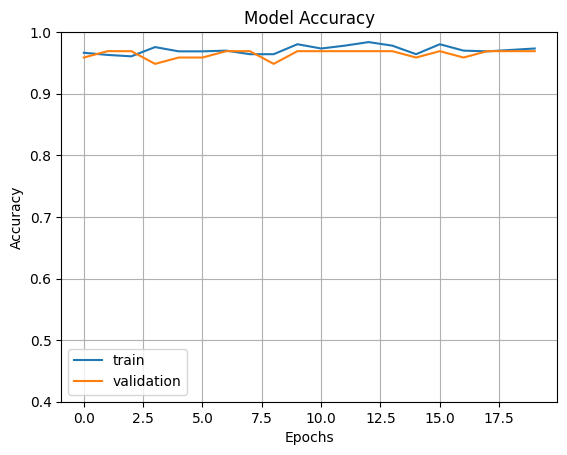

In [20]:
fig1 = plt.gcf()
plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

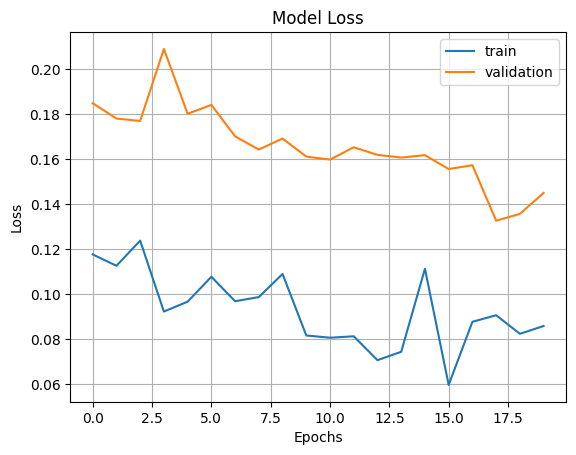

In [21]:
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [22]:
from keras.models import save_model
model.save('My_emotion_detection_model.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 109ms/step
smile


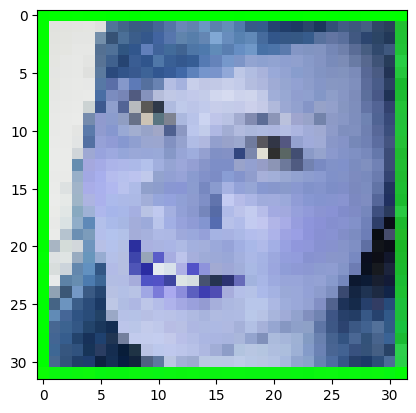

In [33]:
from keras.preprocessing import image
from keras.models import load_model
model = load_model('My_emotion_detection_model.h5')


image_path = 'For_Testing/output_1.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (32, 32))
image = image / 255.0

image = np.expand_dims(image, axis=0)

# closer to 1 is positive (smile) closer to 0 is negative (no smile)
prediction = model.predict(image)

binary_prediction = (prediction > 0.5).astype(int)

label = "smile" if binary_prediction == 1 else "no smile"

print(label)
plt.imshow(image[0])
